# Anscombe's Quartet Analysis

Anscombe's Quartet is a famous dataset constructed by statistician Francis Anscombe in 1973 to illustrate the importance of visualizing data before analyzing it. The quartet consists of four datasets (I, II, III, IV) that share nearly identical summary statistics — yet look dramatically different when plotted.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('anscombe_quartet.tsv', sep='\t')
print(df.shape)
df.head()

(44, 3)


,dataset,x,y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


## Summary Statistics

Each of the four datasets has nearly identical descriptive statistics.

In [2]:
summary_rows = []

for name, group in df.groupby('dataset'):
    x, y = group['x'], group['y']
    slope, intercept, r, p, se = stats.linregress(x, y)
    summary_rows.append({
        'Dataset': name,
        'n': len(x),
        'mean(x)': round(x.mean(), 2),
        'var(x)': round(x.var(ddof=1), 2),
        'mean(y)': round(y.mean(), 2),
        'var(y)': round(y.var(ddof=1), 2),
        'r': round(r, 3),
        'r²': round(r**2, 3),
        'slope': round(slope, 3),
        'intercept': round(intercept, 3),
    })

summary = pd.DataFrame(summary_rows).set_index('Dataset')
summary

,n,mean(x),var(x),mean(y),var(y),r,r²,slope,intercept
Dataset,,,,,,,,,
I,11,9.0,11.0,7.5,4.13,0.816,0.667,0.5,3.000
II,11,9.0,11.0,7.5,4.13,0.816,0.666,0.5,3.001
III,11,9.0,11.0,7.5,4.12,0.816,0.666,0.5,3.002
IV,11,9.0,11.0,7.5,4.12,0.817,0.667,0.5,3.002


The table above confirms Anscombe's original claim: all four datasets share essentially the same summary statistics — same mean and variance for x and y, same correlation coefficient, and the same regression line. A naive analyst relying only on these numbers would conclude the datasets are interchangeable.

## Visualisation

Plotting the four datasets side-by-side immediately reveals how different they really are.

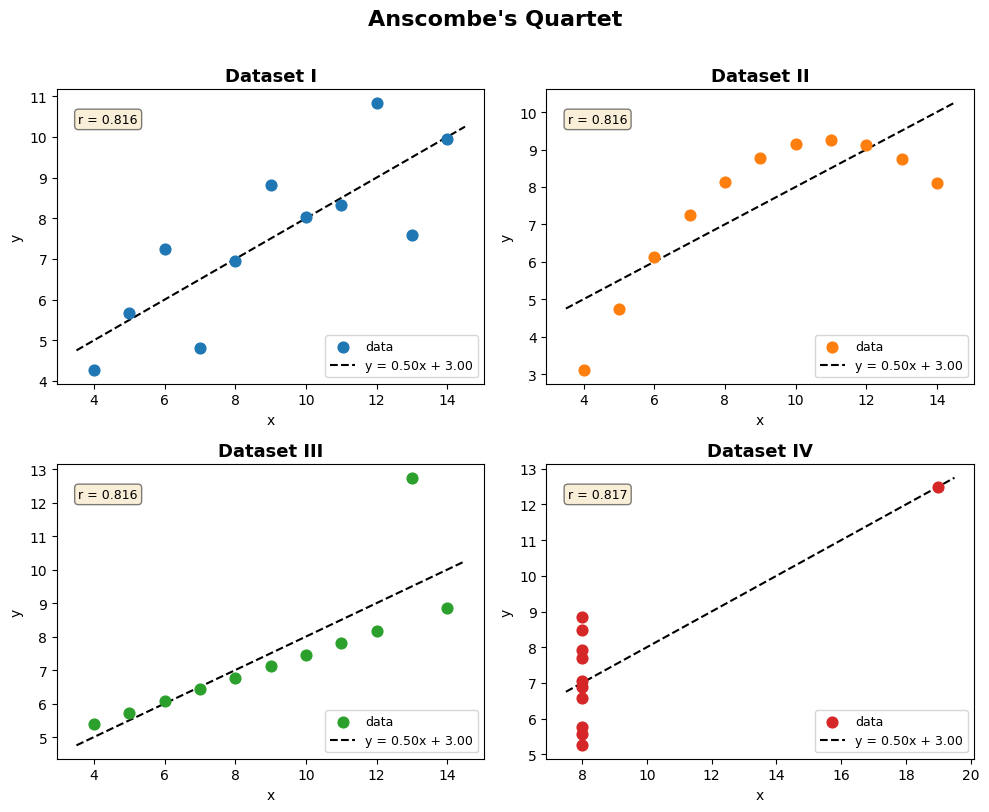

Figure saved to anscombe_quartet.png


In [3]:
datasets = df['dataset'].unique()
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=False, sharey=False)
axes = axes.flatten()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for ax, name, color in zip(axes, datasets, colors):
    group = df[df['dataset'] == name]
    x, y = group['x'], group['y']

    slope, intercept, r, *_ = stats.linregress(x, y)
    x_line = np.linspace(x.min() - 0.5, x.max() + 0.5, 100)
    y_line = slope * x_line + intercept

    ax.scatter(x, y, color=color, s=60, zorder=3, label='data')
    ax.plot(x_line, y_line, color='black', linewidth=1.5, linestyle='--', label=f'y = {slope:.2f}x + {intercept:.2f}')
    ax.set_title(f'Dataset {name}', fontsize=13, fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(fontsize=9)
    ax.text(0.05, 0.92, f'r = {r:.3f}', transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

fig.suptitle("Anscombe's Quartet", fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.savefig('anscombe_quartet.png', dpi=150, bbox_inches='tight')
plt.show()
print('Figure saved to anscombe_quartet.png')

## Interpretation

| Dataset | Structure |
|---------|----------------------------------------------------------------------|
| **I**   | A well-behaved linear relationship with moderate scatter around the regression line. Linear regression is appropriate. |
| **II**  | A smooth, non-linear (quadratic) relationship. A linear model is a poor fit; a polynomial model should be used instead. |
| **III** | Mostly a perfect linear fit, but with one influential outlier that dramatically shifts the regression line. |
| **IV**  | All x-values are identical except for a single leverage point at x = 19. The regression line is entirely determined by that one outlier. |

## Key Takeaway

Anscombe's Quartet is a canonical reminder that **summary statistics alone cannot characterise a dataset**. Correlation coefficients and regression lines can be identical across fundamentally different data distributions. Always visualise your data before — and after — modelling.